# 🔎 Supervised Learning

> ## 🌳 Decision Tree VS 🌲🌲 Random Forest VS 🏹 SVM

#### This is a little project to show out how different classifier algorithms perform with determined data.

### 1st) Let's prepare our environment

In [45]:
# Install/ Import libraries
import numpy as np
import os
from sklearn.datasets import load_wine

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

from IPython import get_ipython

import graphviz
import pydot

import matplotlib as mpl
import matplotlib.pyplot as plt


In [46]:
# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [47]:
# Load and save data

wine_df = load_wine()
X = wine_df.data
y = wine_df.target


### 2nd) Exploring the data

In [48]:
print("Number of features: ", len(wine_df.feature_names),"\n", wine_df.feature_names)
print("\nWhich classes of wine do we have?\n", wine_df.target_names)

Number of features:  13 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Which classes of wine do we have?
 ['class_0' 'class_1' 'class_2']


### 3rd) Split & Training

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


## DECISION TREE

In [50]:
# Building our model
tree_clf = DecisionTreeClassifier(max_depth=7) # We will select up to 7 levels of depth for our classifier. We will also try other levels of depth just to show how it performs and if it is really worthy to go deeper in this case.

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
# Let's create a new file to show our decision tree:
f = open("c:\\Users\\nveigamo\\wine_tree.dot", "w")

export_graphviz(tree_clf, 
                out_file = f,
                feature_names=wine_df.feature_names, 
                class_names=wine_df.target_names, 
                rounded=True, 
                filled=True)


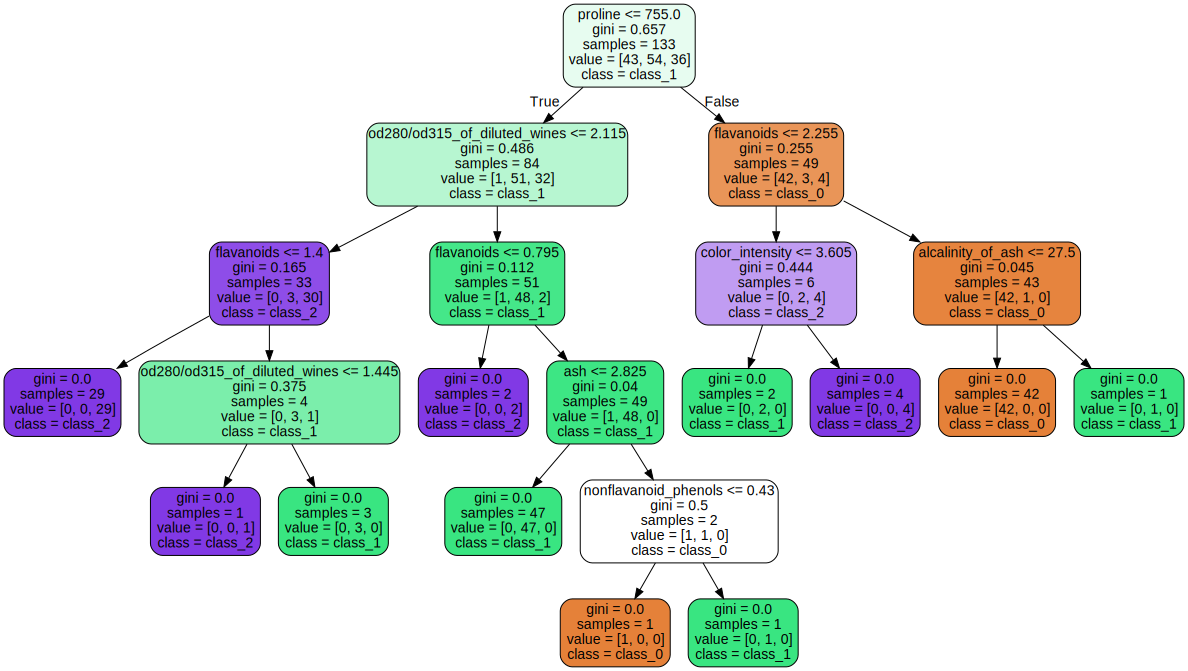

In [52]:
# Let's open our new file to visualize our classifier:
with open("c:\\Users\\nveigamo\\wine_tree.dot") as f:
    dot_graph = f.read()

# Let's see our tree:
graphviz.Source(dot_graph)


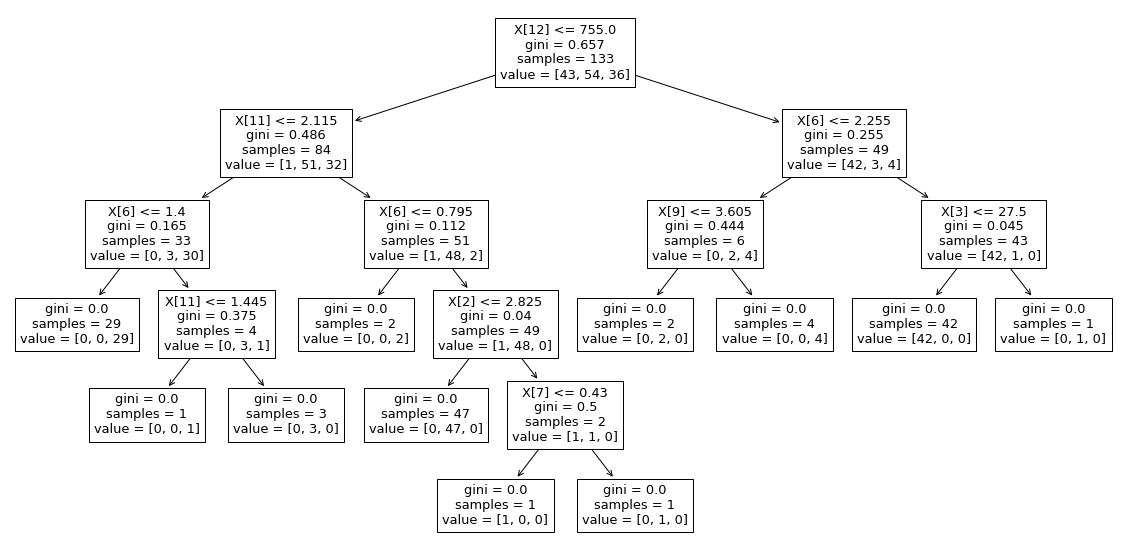

In [53]:
# Let's visualize our tree with another library:
plt.figure(figsize=(20,10))
plot_tree(tree_clf);


### Let's play a little bit with our model :)

In [54]:
# These are the probabilities of the wine, having 15 degrees of alcohol and 4 levels of malic_acid (and taking into account the rest of features manually set), being each Class of Wine.
tree_clf.predict_proba([[15, 4, 1, 2, 1, 2, 4, 2, 0, 7, 0, 0, 0]])

array([[0., 0., 1.]])

According to our model, the introduced values for each category would result in a 100% of probablity to be the Class_02 of wine.

In [55]:
# Which is the most probable class of this wine (with these features) to be? 
print("class position:", tree_clf.predict([[15, 4, 1, 2, 1, 2, 4, 2, 0, 7, 0, 0, 0]]), "= Class_02")

class position: [2] = Class_02


In [56]:
# Now let's fit the model with the X_test to check predictions'accuracy.
y_pred = tree_clf.predict(X_test)
y_pred.shape


(45,)

In [57]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2), "%")

Accuracy: 0.87 %


### DECISION TREE TUNED

In [58]:
# Let's try changing "criterion=entropy", "max_leaf_nodes=100", "min_samples_split=4" and set default "max_depth=None". By default, these hyperparameters are "gini", "2" and "None" for the last two.

tree_clf_new = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None,
min_samples_split=4, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=100, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)



In [59]:
tree_clf_new.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
f = open("c:\\Users\\nveigamo\\wine_tree.dot", "w")

export_graphviz(tree_clf_new, 
                out_file = f,
                feature_names=wine_df.feature_names, 
                class_names=wine_df.target_names, 
                rounded=True, 
                filled=True)


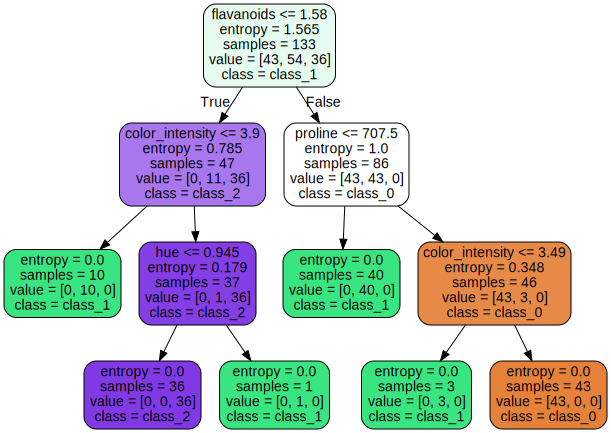

In [61]:
with open("c:\\Users\\nveigamo\\wine_tree.dot") as f:
    dot_graph = f.read()

# remove the display(...)
graphviz.Source(dot_graph)


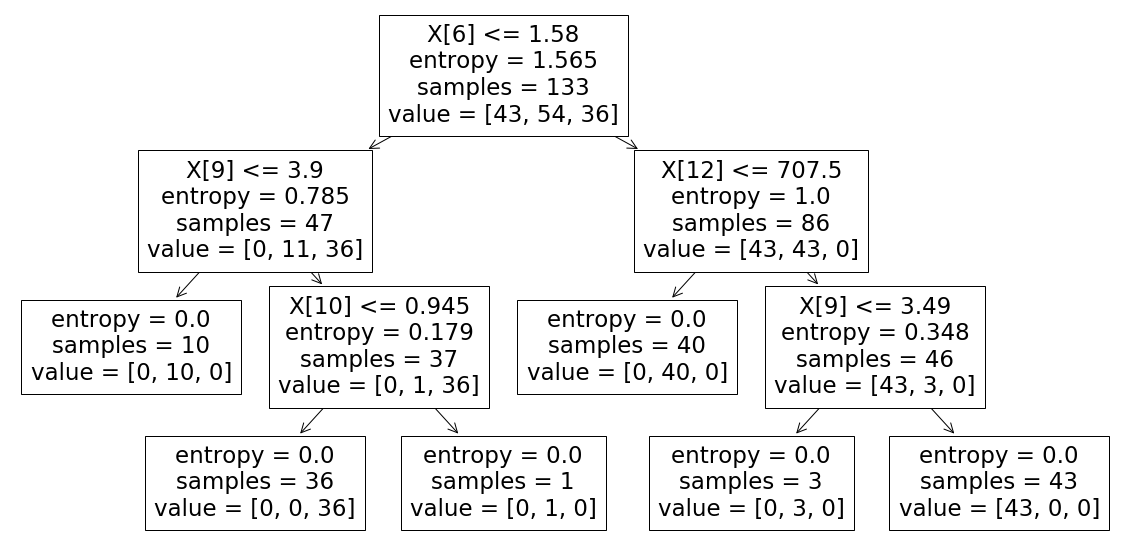

In [62]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf_new)
plt.show()


In [63]:
# Playing with some features again:
tree_clf_new.predict_proba([[15, 4, 1, 2, 1, 2, 4, 2, 0, 7, 0, 0, 0]])

array([[0., 1., 0.]])

In [64]:
# Now let's fit the model with the X_test to check predictions'accuracy.
y_pred_new = tree_clf_new.predict(X_test)
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_new), 2), "%")

Accuracy: 0.91 %


## RANDOM FOREST:

In [65]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


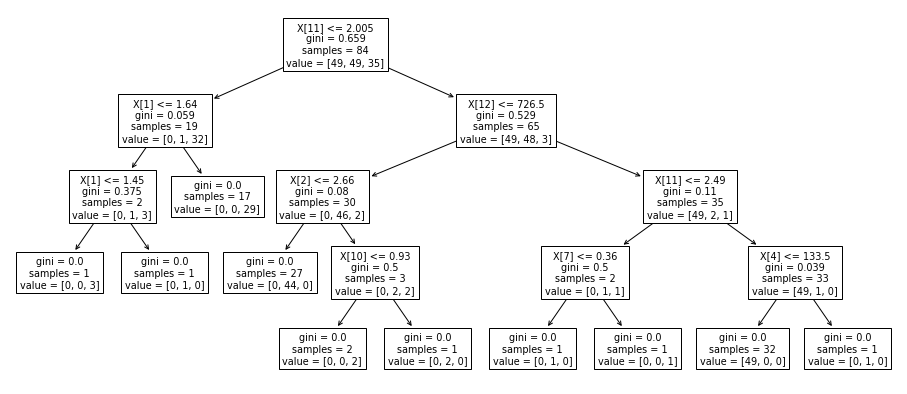

In [66]:
# Pull out one tree from the forest
tree = rfc.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = wine_df.feature_names, rounded = True, precision = 1)

print(wine_df.feature_names)

plt.figure(figsize=(16,7))
plot_tree(tree)
plt.show()


In [67]:
y_pred_rfc = rfc.predict(X_test)
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_rfc), 2), "%")

## Let's try with SVC:

In [72]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
y_pred_svc = svc.predict(X_test)


In [74]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_svc), 2), "%")

Accuracy: 0.38 %


## 4th) MODEL EVALUATION
### Let's try with the **Confusion Matrix** now!

In [75]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  1,  1],
       [ 1, 13,  3],
       [ 0,  0, 12]])

In [76]:
cm_new = confusion_matrix(y_test, y_pred_new)
cm_new

array([[15,  1,  0],
       [ 1, 16,  0],
       [ 0,  2, 10]])

In [77]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 12]])

In [78]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[ 0, 16,  0],
       [ 0, 17,  0],
       [ 0, 12,  0]])

* We found that our Tree Classifier model **perfectly classifies** Class_01 and Class_03 whereas it **gets confused** in 8% when classifying Class_02 (those samples are classified as Class_01 instead).

* Our Random Forest model's accuracy is better than our tuned Tree Classifier.

* SVC performs far way worse than Decision Tree or Random Rorest Classifiers.

## Let's find the FEATURE IMPORTANCE ranking for wine classification.


In [36]:
# Get numerical feature importances for Random Forest Classifier:
importances_rfc = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances_rfc = [(feature, round(importance, 2)) for feature, importance in zip(wine_df.feature_names, importances_rfc)]
# Sort the feature importances by most important first
feature_importances_rfc = sorted(feature_importances_rfc, key = lambda x: x[1], reverse = True)
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances_rfc]
print()

Variable: color_intensity                Importance: 0.18
Variable: flavanoids                     Importance: 0.15
Variable: proline                        Importance: 0.14
Variable: od280/od315_of_diluted_wines   Importance: 0.13
Variable: alcohol                        Importance: 0.12
Variable: total_phenols                  Importance: 0.07
Variable: hue                            Importance: 0.06
Variable: malic_acid                     Importance: 0.04
Variable: magnesium                      Importance: 0.04
Variable: proanthocyanins                Importance: 0.03
Variable: alcalinity_of_ash              Importance: 0.02
Variable: ash                            Importance: 0.01
Variable: nonflavanoid_phenols           Importance: 0.01



So the most important features are the color intensity, the presence of flavonoids and proline in the wine.